In [2]:
from sklearn import datasets
import pandas as pd
data_breast_cancer = datasets.load_breast_cancer(as_frame=True)
#print(data_breast_cancer['DESCR'])

In [3]:
data_breast_cancer_X, data_breast_cancer_y = datasets.load_breast_cancer(return_X_y= True, as_frame=True)
data_breast_cancer_X = data_breast_cancer_X[['mean texture','mean symmetry']]
data_breast_cancer_X

,mean texture,mean symmetry
0,10.38,0.2419
1,17.77,0.1812
2,21.25,0.2069
3,20.38,0.2597
4,14.34,0.1809
...,...,...
564,22.39,0.1726
565,28.25,0.1752
566,28.08,0.1590
567,29.33,0.2397


In [1532]:
import numpy as np
import pandas as pd
size = 300

In [1533]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_breast_cancer_X, data_breast_cancer_y, test_size=0.2)

In [1534]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
depth = 8
tree_clf = DecisionTreeClassifier(max_depth=depth,random_state=42)
tree_clf.fit(data_breast_cancer_X, data_breast_cancer_y)
f = "bc"
export_graphviz(tree_clf,out_file=f, rounded=True, filled=True)

In [1535]:
import graphviz
graph = graphviz.Source.from_file(f)

In [1536]:
print(graphviz.render('dot', 'png', f))

bc.png


In [1537]:
# współczynniki f1 
import sklearn.metrics

y_train_predict = tree_clf.predict(X_train)
y_test_predict = tree_clf.predict(X_test)

f1_train = sklearn.metrics.f1_score(y_train_predict, y_train)
f1_test = sklearn.metrics.f1_score(y_test_predict, y_test)

acc_train = sklearn.metrics.accuracy_score(y_train_predict, y_train)
acc_test = sklearn.metrics.accuracy_score(y_test_predict, y_test)

f1acc_tree  = [depth, f1_train, f1_test, acc_train, acc_test]
f1acc_tree

[8,
 0.907473309608541,
 0.9219858156028369,
 0.8857142857142857,
 0.9035087719298246]

In [1538]:
import pickle
with open('f1acc_tree.pkl', 'wb') as f_cva:
    pickle.dump(f1acc_tree, f_cva)

<AxesSubplot:xlabel='x', ylabel='y'>

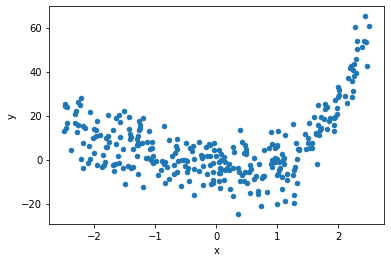

In [1539]:
import numpy as np
import pandas as pd
size = 300
X = np.random.rand(size)*5-2.5
w4, w3, w2, w1, w0 = 1, 2, 1, -4, 2
y = w4*(X**4) + w3*(X**3) + w2*(X**2) + w1*X + w0 + np.random.randn(size)*8-4
df = pd.DataFrame({'x': X, 'y': y})
df.plot.scatter(x='x',y='y')

In [1540]:
X_train, X_test = X[:240], X[240:]
y_train, y_test = y[:240], y[240:]
X_train = X_train.reshape(-1,1)
y_train = y_train.reshape(-1,1)
X_test = X_test.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

In [1541]:
from sklearn.tree import DecisionTreeRegressor
depth = 4
tree_reg = DecisionTreeRegressor(max_depth=depth)
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4)

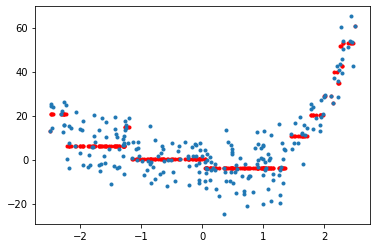

In [1542]:
from matplotlib import pyplot as plt
import matplotlib

plt.plot(X_train, tree_reg.predict(X_train), "r.")
plt.plot(X_train, y_train, ".")

In [1543]:
from sklearn.metrics import mean_squared_error

y_train_predict = tree_reg.predict(X_train)
y_test_predict = tree_reg.predict(X_test)

mse_train = mean_squared_error(y_train, y_train_predict)
mse_test = mean_squared_error(y_test, y_test_predict)

In [1544]:
mse_test

71.1944533391524

In [1545]:
mse_train

51.4288542190324

In [1546]:
f = "reg"
export_graphviz(tree_reg,out_file=f, rounded=True, filled=True)

In [1547]:
import graphviz
graph = graphviz.Source.from_file(f)
print(graphviz.render('dot', 'png', f))

reg.png


In [1548]:
mse_tree = [depth, mse_train, mse_test]
import pickle
with open('mse_tree.pkl', 'wb') as f_cva:
    pickle.dump(mse_tree, f_cva)

mse_tree

[4, 51.4288542190324, 71.1944533391524]